In [1]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [113]:
df = pd.read_excel(u'C:\\Users\\Wang\\Desktop\\PythonTest\\interpolate\\dataP\\234_rankP_avg.xlsx')
#檔案欄位名稱
df.head()

,lon,lat,ID,1368,1369,1370,1371,1372,1373,1374,...,1905,1906,1907,1908,1909,1910,1911,1912,(空白),總計
0,121.494508,31.339228,11000,0.0,0.0,0.0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.100806
1,121.636161,31.230935,11001,0.0,0.0,0.0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.133333
2,121.549837,30.915938,11002,0.0,0.0,0.0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,-0.164179
3,121.212828,31.011963,11003,0.0,0.0,0.0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.242604
4,121.231712,30.833118,11004,0.0,0.0,0.0,0,0,0,0,...,0.555556,0.0,0.2,0.0,0.0,0.0,0.5,0,0,0.397059


In [114]:
LON = df[u'lon'].values
LAT = df[u'lat'].values
#RANKP = df[u'rankP'].values
RANKP = df.iloc[:,3]
RANKP
#LON = LON.astype('float64')
#LAT = LAT.astype('float64')
#RANKP = RANKP.astype('float64')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7      -0.5
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
1535    0.0
1536    0.0
1537    0.0
1538    0.0
1539    0.0
1540    0.0
1541    0.0
1542    0.0
1543    0.0
1544    0.0
1545    0.0
1546    0.0
1547    0.0
1548    0.0
1549    0.0
1550    0.0
1551    0.0
1552    0.0
1553    0.0
1554    0.0
1555    0.0
1556    0.0
1557    0.0
1558    0.0
1559    0.0
1560    0.0
1561    0.0
1562    0.0
1563    0.0
1564    0.0
Name: 1368, Length: 1565, dtype: float64

Plotting Enabled

Initializing variogram model...
Coordinates type: 'geographic' 

Using 'spherical' Variogram Model
Partial Sill: 0.00889917510994
Full Sill: 0.00889917516586
Range: 2.85424451143
Nugget: 5.59230773277e-11 



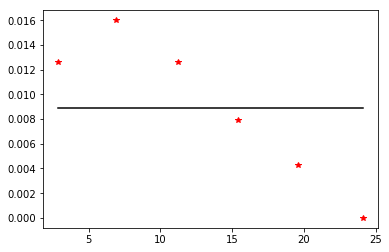

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



In [115]:
#要內插的點
#gridx, gridy = np.mgrid[108:126, 20:44]
gridx = np.arange(97.0, 124.0, 1.0)
gridy = np.arange(17.0, 45.0, 1.0)
# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.
OK = OrdinaryKriging(LON, LAT, RANKP, variogram_model='spherical', coordinates_type='geographic',
                     verbose=True, enable_plotting=True)

#OK = OrdinaryKriging(LON, LAT, RANKP, variogram_model='linear',
#verbose=True, enable_plotting=True)
# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See OrdinaryKriging.__doc__ for more information.)
z, ss = OK.execute('grid', gridx, gridy)
# Writes the kriged grid to an ASCII grid file.
#kt.write_asc_grid(gridx, gridy, z, filename="output.asc")


In [116]:
%matplotlib inline

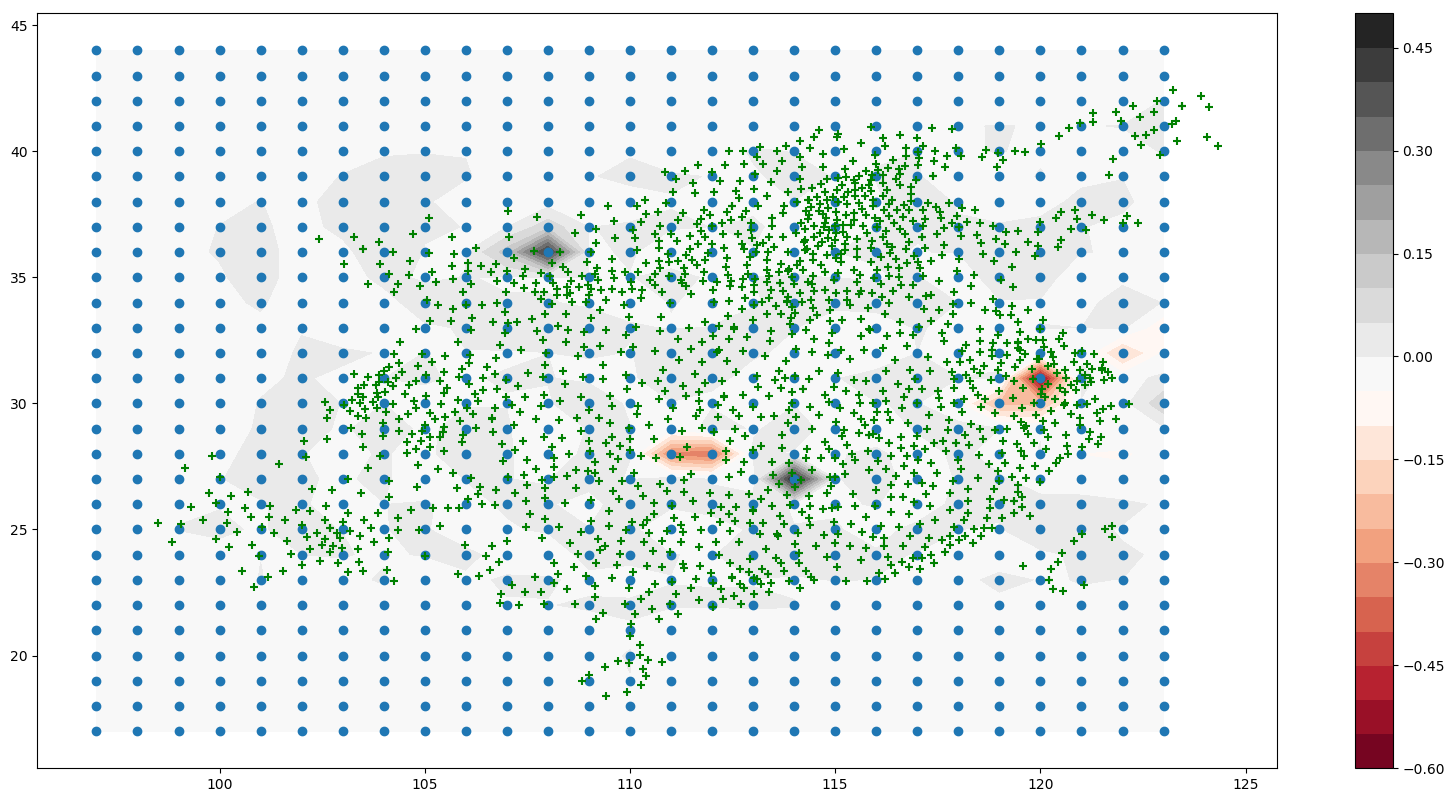

In [120]:
fig = plt.figure(figsize=(20,10),dpi=100)
X, Y = np.meshgrid(gridx, gridy)
Z = z
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.scatter(X,Y)
plt.scatter(LON, LAT, c='green', marker='+')

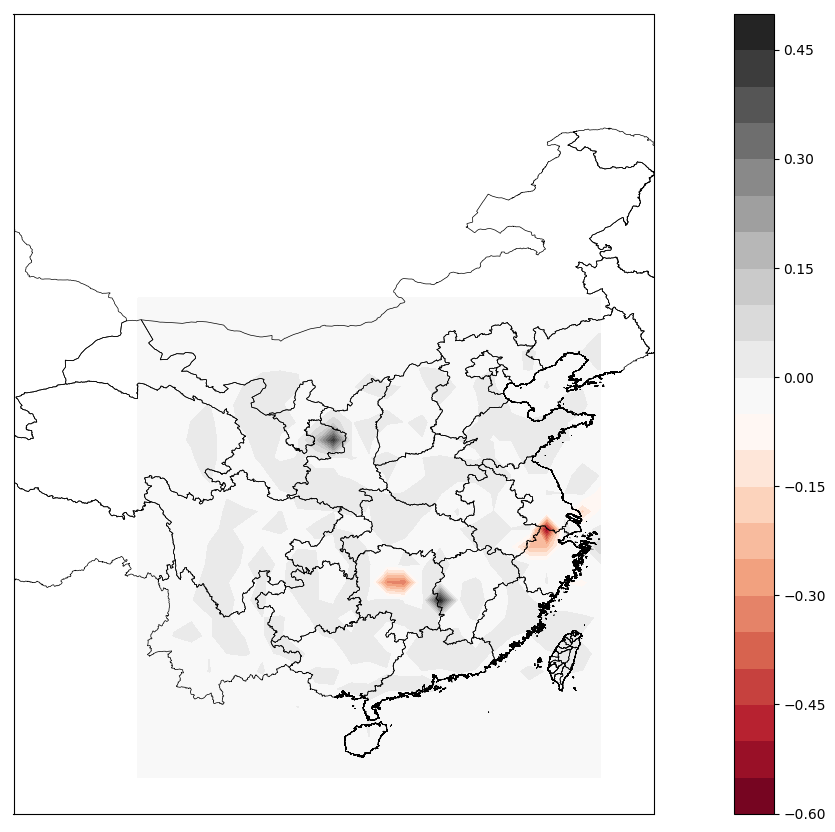

In [118]:
fig = plt.figure(figsize=(20,10),dpi=100)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])
ax1.m = Basemap(llcrnrlon=90, llcrnrlat=15, urcrnrlon=126, urcrnrlat=60, projection='cyl', lat_1=20, lat_2=35, lon_0=110,resolution='h')
#ax1.m = Basemap(llcrnrlon=115, llcrnrlat=20, urcrnrlon=125, urcrnrlat=27, projection='cyl', lat_1=20, lat_2=35, lon_0=120,resolution='h')
#ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm1', 'taiwan', drawbounds=True, color='black')
ax1.m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm2', 'taiwan', drawbounds=True, color='black')

X, Y = np.meshgrid(gridx, gridy)
Z = z
#plt.contourf(X, Y, Z, 20, cmap='gray')
plt.contourf(X, Y, Z, 20, cmap='RdGy')
#plt.contourf(X, Y, Z, 20, cmap='Paired')
plt.colorbar()
#plt.scatter(X,Y)
#plt.scatter(LON, LAT, c='b', marker='+')